In [84]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('/Users/kyle/Library/CloudStorage/OneDrive-SKKU/바탕 화면/김동겸/etc/Python/data/synthetic_personal_finance_dataset.csv')

In [86]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [31]:
df.columns

Index(['user_id', 'age', 'gender', 'education_level', 'employment_status',
       'job_title', 'monthly_income_usd', 'monthly_expenses_usd',
       'savings_usd', 'has_loan', 'loan_type', 'loan_amount_usd',
       'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct',
       'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio',
       'region', 'record_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

<BarContainer object of 5 artists>

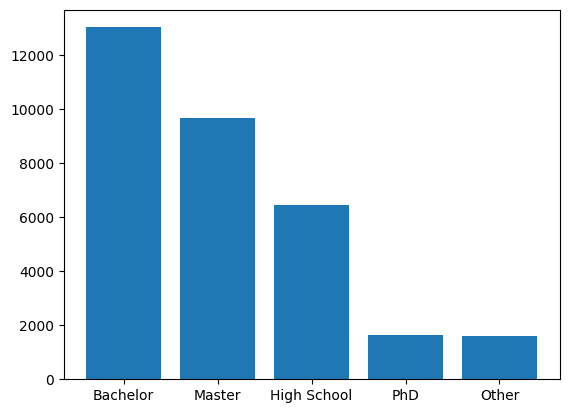

In [8]:
education_level_values_counts = df['education_level'].value_counts()
education_level_values = education_level_values_counts.index
plt.bar(education_level_values, education_level_values_counts)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Driver'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Manager'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Accountant'),
  Text(6, 0, 'Salesperson'),
  Text(7, 0, 'Doctor'),
  Text(8, 0, 'Engineer')])

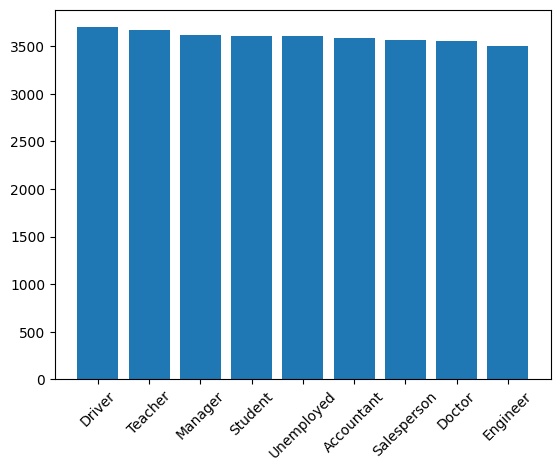

In [9]:
job_title_values_counts = df['job_title'].value_counts()
job_title_values = job_title_values_counts.index
plt.bar(job_title_values, job_title_values_counts)
plt.xticks(rotation=45)

<BarContainer object of 2 artists>

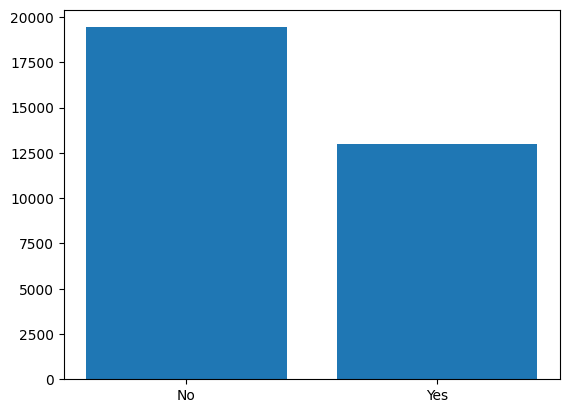

In [10]:
has_loan_values_counts = df['has_loan'].value_counts()
has_loan_values = has_loan_values_counts.index
plt.bar(has_loan_values, has_loan_values_counts)

<BarContainer object of 5 artists>

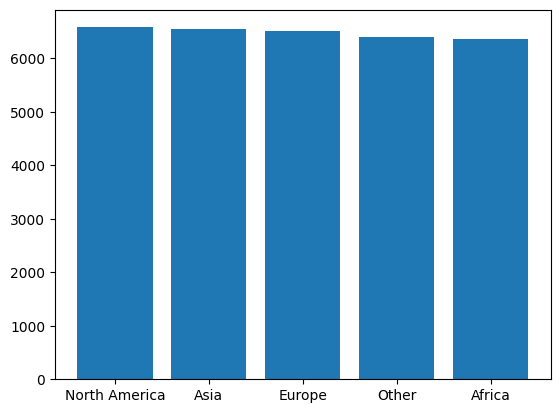

In [11]:
region_values_counts = df['region'].value_counts()
region_values = region_values_counts.index
plt.bar(region_values, region_values_counts)

In [ ]:
# credit_score, monthly_income, dti 등으로 위험도가 비슷한 집단끼리 군집화

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 정규화
columns = ['monthly_income_usd', 'debt_to_income_ratio', 'credit_score']

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[columns])
df_scaled = pd.DataFrame(df_scaled, columns=columns)

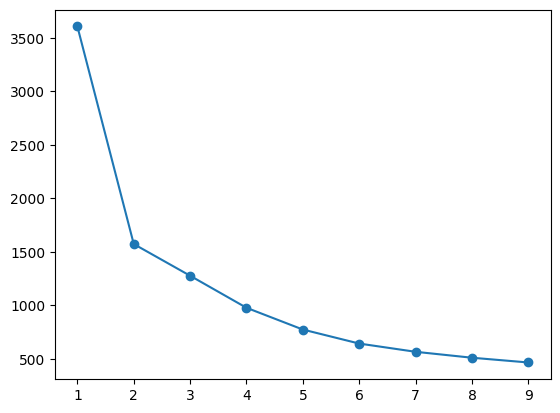

In [8]:
# Elbow method
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')

In [15]:
# KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=100)
df['Segment'] = kmeans.fit_predict(df_scaled)

df[['user_id', 'Segment']].head()

,user_id,Segment
0,U00001,1
1,U00002,3
2,U00003,0
3,U00004,2
4,U00005,3


In [19]:
# Segment별 평균값 -> Segment별로 위험도 분석
df.groupby('Segment')[['monthly_income_usd', 'debt_to_income_ratio', 'credit_score']].mean()

,monthly_income_usd,debt_to_income_ratio,credit_score
Segment,,,
0,4021.653169,1.247857,767.103010
1,2403.286201,1.867595,410.859988
2,5739.862396,0.547065,409.027168
3,4010.150806,1.111526,599.826123


In [ ]:
# 랜덤포레스트로 loan_amount_usd 예측

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# 데이터 준비
X = df[['monthly_income_usd', 'debt_to_income_ratio', 'credit_score']]
y = df['loan_amount_usd']

In [38]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)


In [40]:
# 모델 학습 및 예측
model = RandomForestRegressor(n_estimators=100, random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
# 평가 지표
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 4683726441.013693
R^2: 0.8009066804076057


In [43]:
df['estimated_loan_amounts'] = model.predict(X_scaled)

In [46]:
df[['loan_amount_usd', 'estimated_loan_amounts']].head(10)

,loan_amount_usd,estimated_loan_amounts
0,0.00,0.0000
1,146323.34,197920.4550
2,0.00,0.0000
3,93242.37,253160.7698
4,0.00,0.0000
5,407915.25,402992.0130
6,296057.60,328936.1797
7,0.00,0.0000
8,0.00,0.0000
9,324197.37,304219.8925


In [ ]:
# 랜덤포레스트로 credit_score 예측

In [52]:
X = df[['monthly_income_usd', 'debt_to_income_ratio', 'loan_amount_usd']]
y = df['credit_score']

In [53]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [54]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)


In [55]:
# 모델 학습 및 예측
rf = RandomForestRegressor(n_estimators=200, random_state=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [57]:
# 평가 지표
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 33038.51813575593
R^2: -0.31816746520466266


In [59]:
df['estimated_credit_score'] = rf.predict(X_scaled)
df[['credit_score', 'estimated_credit_score']].head(10)

,credit_score,estimated_credit_score
0,430,533.990
1,543,568.350
2,754,744.395
3,461,557.350
4,516,581.825
5,718,668.055
6,761,660.655
7,540,594.375
8,327,530.025
9,558,589.335


In [60]:
# 상관관계 분석

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

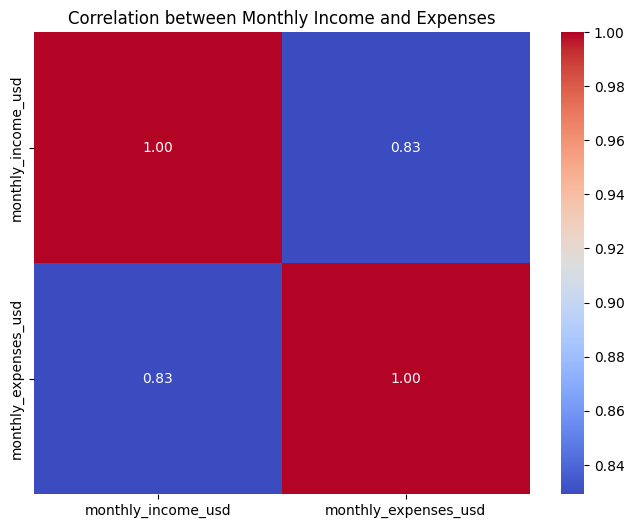

In [68]:
# 소득과 소비 간 상관관계: Pearson correlation
columns1 = ['monthly_income_usd', 'monthly_expenses_usd']
correlation1 = df[columns].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Monthly Income and Expenses')
plt.show()

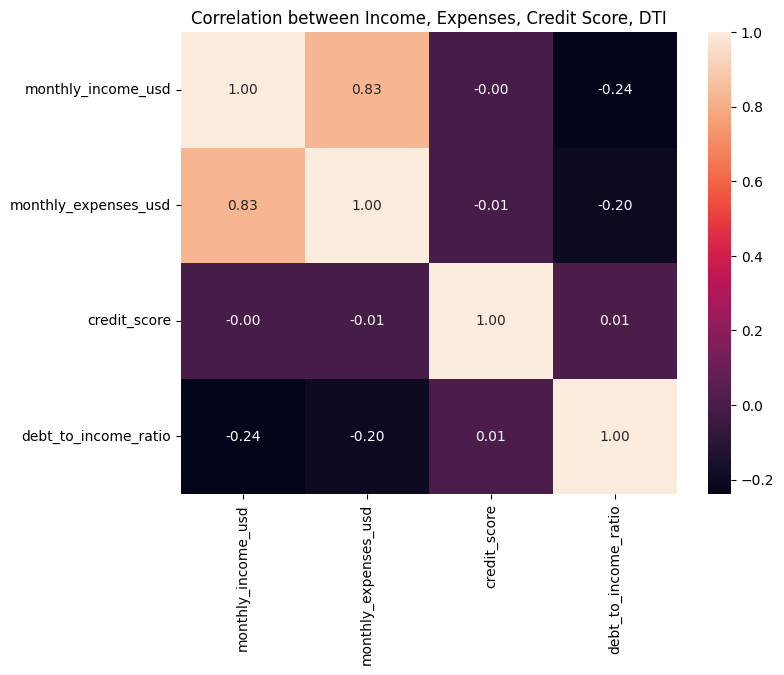

In [ ]:
# 소득, 소비, 신용도, DTI 간 상관관계: Pearson correlation
columns2 = ['monthly_income_usd', 'monthly_expenses_usd', 'credit_score', 'debt_to_income_ratio']
correlation2 = df[columns2].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation2, annot=True, fmt='.2f')
plt.title('Correlation between Income, Expenses, Credit Score, DTI')
plt.show()

In [81]:
# 범주형 변수와 수치형 변수 간 상관관계 분석: Point-Biserial Correlation
# (단, 이 때 범주형 변수는 0과 1로 변환되어야 함)
# 빚과 신용도 간 상관관계 분석
df['has_loan'] = df['has_loan'].replace({'Yes': 1, 'No': 0})

/var/folders/tz/m_4fr84s1g53qp6mdx_8wh1r0000gn/T/ipykernel_2749/1287594628.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_loan'] = df['has_loan'].replace({'Yes': 1, 'No': 0})


In [83]:
from scipy.stats import pointbiserialr
r, p = pointbiserialr(df['has_loan'], df['credit_score'])
print(f"Point Biserial Correlation: {r}, p-value: {p}")

Point Biserial Correlation: 0.00873039810903094, p-value: 0.11594523405087793
